## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime, timedelta

## Importing the dataset

In [2]:
#Load the customer info CSV file
customer = pd.read_csv('Customer.csv')

#Load the product category info CSV file
prod_cat_info = pd.read_csv('prod_cat_info.csv')

#Load the transaction CSV file
transactions = pd.read_csv('Transactions.csv')

In [3]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,2/1/1970,M,4.0
1,269696,7/1/1970,F,8.0
2,268159,8/1/1970,F,8.0
3,270181,10/1/1970,F,2.0
4,268073,11/1/1970,M,1.0


In [4]:
transactions.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,ABS_Qty,ABS_Rate,ABS_total_amt
0,8410316370,266783,20-02-2013,4,1,1,869,91.245,960.245,e-Shop,1,869,91.245
1,16999552161,266783,9/2/2013,10,5,2,835,175.350,1845.350,e-Shop,2,835,175.350
2,98477711300,266783,21-10-2012,4,1,3,93,29.295,308.295,TeleShop,3,93,29.295
3,25890929042,266783,24-09-2011,1,2,-4,-1321,554.820,-5838.820,e-Shop,4,1321,554.820
4,25890929042,266783,23-09-2011,1,2,4,1321,554.820,5838.820,e-Shop,4,1321,554.820


## Merging three datasets into one

In [5]:
common_header = 'customer_Id'

# Merge the two DataFrames based on the common header 'customer_id'
cust_trans = pd.merge(customer, transactions, on=common_header, how='outer')

#Save the mergerd DataFrame to a new CSV file
cust_trans.to_csv('cust_trans.csv', index=False)

In [6]:
merged_df = pd.merge(cust_trans, prod_cat_info, on=['prod_cat_code', 'prod_subcat_code'], how='left')

merged_df.to_csv('merged_df.csv', index=False)

In [7]:
merged_df.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,ABS_Qty,ABS_Rate,ABS_total_amt,prod_cat,prod_subcat
0,268408,2/1/1970,M,4.0,8.724384e+10,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,5.0,187.0,98.175,Books,Fiction
1,268408,2/1/1970,M,4.0,1.619787e+10,16-12-2013,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,5.0,210.0,110.250,Bags,Mens
2,268408,2/1/1970,M,4.0,1.619787e+10,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,5.0,210.0,110.250,Bags,Mens
3,268408,2/1/1970,M,4.0,2.881014e+10,2/9/2013,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,2.0,813.0,170.730,Home and kitchen,Kitchen
4,268408,2/1/1970,M,4.0,6.463344e+10,6/5/2013,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,3.0,312.0,98.280,Footwear,Kids


In [8]:
merged_df.shape

(23194, 18)

## Exploring the data

In [9]:
merged_df["DOB"] = pd.to_datetime(merged_df["DOB"], dayfirst=True)
merged_df["tran_date"] = pd.to_datetime(merged_df["tran_date"], dayfirst=True)

In [10]:
merged_df['Age'] = round((merged_df['tran_date'] - merged_df['DOB'])/timedelta(days=365.2425))
print(merged_df['Age'])

0        44.0
1        44.0
2        44.0
3        44.0
4        43.0
         ... 
23189    19.0
23190    19.0
23191    20.0
23192    20.0
23193    20.0
Name: Age, Length: 23194, dtype: float64


In [11]:
#merged_df.to_csv('Data.csv', mode='w', index=False, header=True)

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23194 entries, 0 to 23193
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_Id       23194 non-null  int64         
 1   DOB               23194 non-null  datetime64[ns]
 2   Gender            23185 non-null  object        
 3   city_code         23186 non-null  float64       
 4   transaction_id    23053 non-null  float64       
 5   tran_date         23053 non-null  datetime64[ns]
 6   prod_subcat_code  23053 non-null  float64       
 7   prod_cat_code     23053 non-null  float64       
 8   Qty               23053 non-null  float64       
 9   Rate              23053 non-null  float64       
 10  Tax               23053 non-null  float64       
 11  total_amt         23053 non-null  float64       
 12  Store_type        23053 non-null  object        
 13  ABS_Qty           23053 non-null  float64       
 14  ABS_Rate          2305

In [13]:
merged_df.shape

(23194, 19)

In [14]:
merged_df.describe()

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,ABS_Qty,ABS_Rate,ABS_total_amt,Age
count,23194.000000,23186.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271022.609296,5.480204,5.007348e+10,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,3.007331,787.048323,248.667192,31.069362
std,2431.350129,2.863884,2.898194e+10,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,1.420576,415.750367,187.177773,6.693794
min,266783.000000,1.000000,3.268991e+06,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000,70.000000,7.350000,18.000000
25%,268936.000000,3.000000,2.493864e+10,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,2.000000,426.000000,98.280000,25.000000
50%,270981.000000,5.000000,5.009313e+10,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,3.000000,791.000000,199.080000,31.000000
75%,273115.750000,8.000000,7.533000e+10,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,4.000000,1150.000000,365.715000,37.000000
max,275265.000000,10.000000,9.998755e+10,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,5.000000,1500.000000,787.500000,44.000000


In [15]:
merged_df.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,ABS_Qty,ABS_Rate,ABS_total_amt,prod_cat,prod_subcat,Age
0,268408,1970-01-02,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,5.0,187.0,98.175,Books,Fiction,44.0
1,268408,1970-01-02,M,4.0,1.619787e+10,2013-12-16,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,5.0,210.0,110.250,Bags,Mens,44.0
2,268408,1970-01-02,M,4.0,1.619787e+10,2013-12-12,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,5.0,210.0,110.250,Bags,Mens,44.0
3,268408,1970-01-02,M,4.0,2.881014e+10,2013-09-02,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,2.0,813.0,170.730,Home and kitchen,Kitchen,44.0
4,268408,1970-01-02,M,4.0,6.463344e+10,2013-05-06,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,3.0,312.0,98.280,Footwear,Kids,43.0


In [16]:
df  = merged_df.drop(['customer_Id', 'DOB', 'transaction_id' , 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt','ABS_Qty', 'ABS_total_amt'], axis=1)

In [17]:
df.head()

,Gender,city_code,Store_type,ABS_Rate,prod_cat,prod_subcat,Age
0,M,4.0,TeleShop,187.0,Books,Fiction,44.0
1,M,4.0,Flagship store,210.0,Bags,Mens,44.0
2,M,4.0,Flagship store,210.0,Bags,Mens,44.0
3,M,4.0,TeleShop,813.0,Home and kitchen,Kitchen,44.0
4,M,4.0,Flagship store,312.0,Footwear,Kids,43.0


## Taking care of missing data and duplicates

In [18]:
df.isnull().sum()

Gender           9
city_code        8
Store_type     141
ABS_Rate       141
prod_cat       141
prod_subcat    141
Age            141
dtype: int64

In [19]:
df = df.dropna()

In [20]:
df.isnull().sum()

Gender         0
city_code      0
Store_type     0
ABS_Rate       0
prod_cat       0
prod_subcat    0
Age            0
dtype: int64

In [21]:
df.duplicated().sum()

2143

In [22]:
df1 = df.drop_duplicates()

In [23]:
df1.duplicated().sum()

0

## Data visualization

In [24]:
corr = merged_df.corr(numeric_only=True)
corr

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,ABS_Qty,ABS_Rate,ABS_total_amt,Age
customer_Id,1.000000,0.014919,0.015369,0.005263,-0.002977,0.006422,-0.000704,-0.006006,0.001197,-0.007254,-0.002337,-0.006006,0.036060
city_code,0.014919,1.000000,-0.012228,-0.009582,-0.016285,-0.008042,-0.002529,0.005136,-0.003810,-0.002362,0.009358,0.005136,0.010935
transaction_id,0.015369,-0.012228,1.000000,-0.009371,-0.004660,-0.007459,-0.006299,0.000022,-0.008688,-0.001467,0.003521,0.000022,-0.009206
prod_subcat_code,0.005263,-0.009582,-0.009371,1.000000,0.560860,0.005157,0.001255,-0.006719,0.002867,-0.002780,-0.007133,-0.006719,-0.006376
prod_cat_code,-0.002977,-0.016285,-0.004660,0.560860,1.000000,-0.006533,-0.004532,-0.010723,-0.007551,-0.004772,-0.004843,-0.010723,-0.000959
Qty,0.006422,-0.008042,-0.007459,0.005157,-0.006533,1.000000,0.581108,0.306539,0.791938,0.501333,-0.007790,0.306539,0.001724
Rate,-0.000704,-0.002529,-0.006299,0.001255,-0.004532,0.581108,1.000000,0.367249,0.829965,-0.007588,0.534727,0.367249,-0.002939
Tax,-0.006006,0.005136,0.000022,-0.006719,-0.010723,0.306539,0.367249,1.000000,0.620969,0.629100,0.704072,1.000000,0.000613
total_amt,0.001197,-0.003810,-0.008688,0.002867,-0.007551,0.791938,0.829965,0.620969,1.000000,0.392387,0.438368,0.620969,0.000443
ABS_Qty,-0.007254,-0.002362,-0.001467,-0.002780,-0.004772,0.501333,-0.007588,0.629100,0.392387,1.000000,0.002276,0.629100,0.001561


<Axes: >

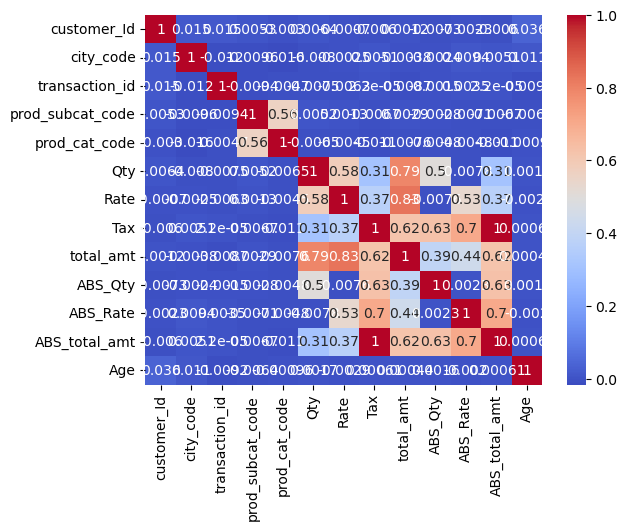

In [25]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [26]:
#sns.pairplot(merged_df)

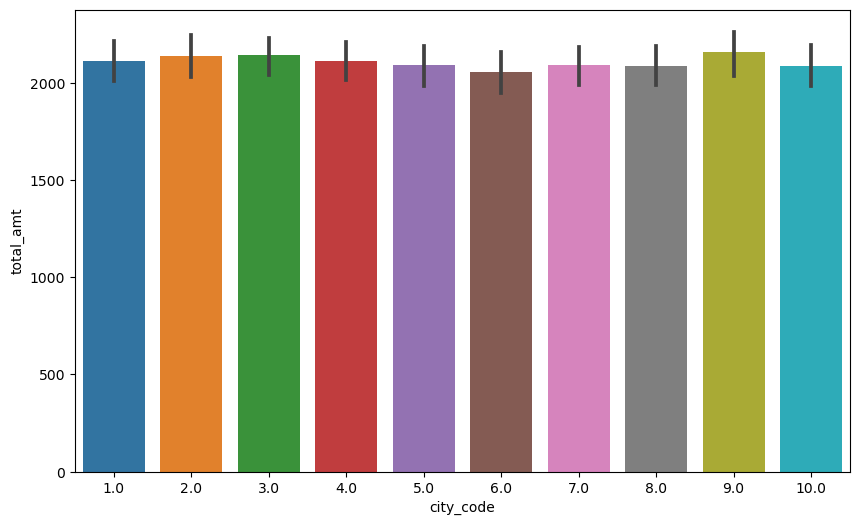

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='city_code',y='total_amt',data=merged_df)
plt.show()

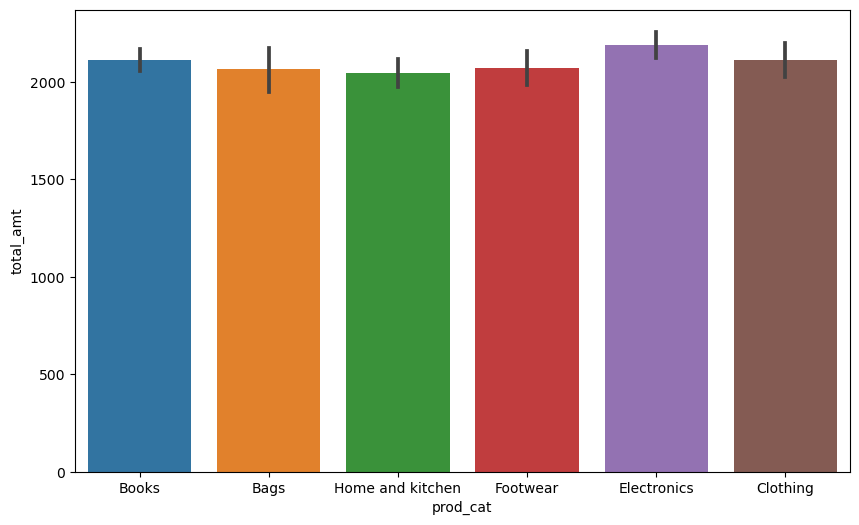

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x='prod_cat',y='total_amt',data=merged_df)
plt.show()

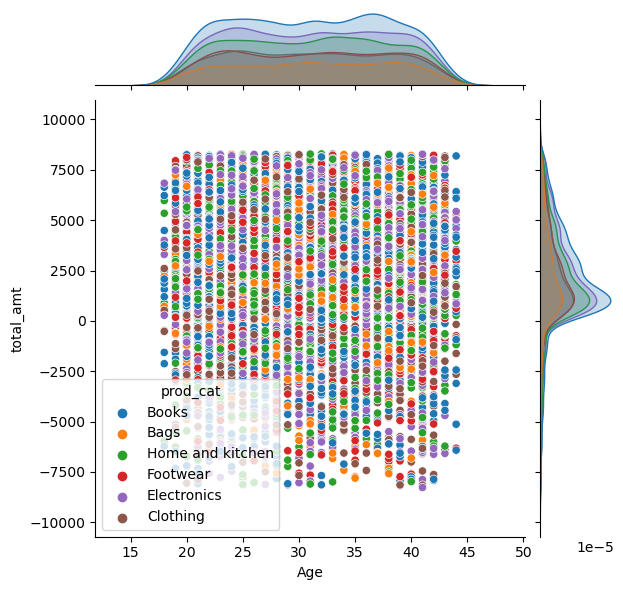

In [29]:
sns.jointplot(data=merged_df, x="Age", y="total_amt", hue="prod_cat")

## Feature Selection

In [30]:
#df1.head()

In [31]:
X1 = df1.drop(['prod_cat'], axis = 1)

In [32]:
X1.shape

(20893, 6)

In [33]:
y1 = df1['prod_cat']

In [34]:
y1.shape

(20893,)

## Encoding independent variables

In [35]:
categorical_cols = ['Gender', 'Store_type', 'prod_subcat', 'city_code'] 

X = pd.get_dummies(X1, columns = categorical_cols, drop_first=True)

In [36]:
X.shape

(20893, 32)

In [37]:
#X

## Encoding dependent variable

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y1)

In [39]:
print(y)

[1 0 5 ... 4 4 1]


## Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape

(16714, 32)

In [43]:
X_test.shape

(4179, 32)

## Feature Scaling

In [44]:
#from sklearn.preprocessing import MinMaxScaler

#ms = MinMaxScaler()
#ms.fit(X_train)
#X_train = ms.transform(X_train)
#X_test = ms.transform(X_test)

In [45]:
#X_train

In [46]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [47]:
X_train

array([[ 1.06007484,  0.89085156, -1.02508417, ...,  2.97572728,
        -0.32243296, -0.33836307],
       [-1.39880351, -1.6483694 , -1.02508417, ..., -0.3360523 ,
         3.10141993, -0.33836307],
       [-1.07912529,  1.18958344,  0.97552965, ...,  2.97572728,
        -0.32243296, -0.33836307],
       ...,
       [-1.10556484,  0.59211968,  0.97552965, ..., -0.3360523 ,
        -0.32243296,  2.9554053 ],
       [-0.73300751,  1.7870472 ,  0.97552965, ..., -0.3360523 ,
        -0.32243296, -0.33836307],
       [ 0.85096202, -1.05090565,  0.97552965, ..., -0.3360523 ,
        -0.32243296, -0.33836307]])

## Logistic Regression Classification

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 400, random_state = 0)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [49]:
#print(np.concatenate((ypred.reshape(len(ypred),1), y_test.reshape(len(y_test),1)),1))

In [50]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [51]:
accuracy_score(y_test,ypred)

0.7932519741564967

In [52]:
#confusion_matrix(y_test,ypred)

In [53]:
f1_score(y_test,ypred, average='micro')

0.7932519741564967

## KNN Classification

In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
accuracy_score(y_test,ypred)

0.793491265853075

In [56]:
f1_score(y_test,ypred, average='micro')

0.7934912658530751

## Support Vector Machine Classification

In [57]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
accuracy_score(y_test,ypred)

0.7910983488872936

In [59]:
f1_score(y_test,ypred, average='micro')

0.7910983488872936

## kernel-SVM Classification

In [60]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
accuracy_score(y_test,ypred)

0.7954055994256999

## Naive-Bayes Classification

In [62]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
accuracy_score(y_test,ypred)

0.7475472601100742

## Decision Tree Classification

In [64]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
accuracy_score(y_test,ypred)

0.7884661402249342

## Random Forest Classification

In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
accuracy_score(y_test,ypred)

0.7980378080880594

## Bagging Classifier

In [68]:
from sklearn.ensemble import BaggingClassifier
classifier = BaggingClassifier()
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
accuracy_score(y_test,ypred)

0.79923426657095

## Extra Trees Classifier

In [70]:
from sklearn.tree import ExtraTreeClassifier
classifier = ExtraTreeClassifier()
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
accuracy_score(y_test,ypred)

0.7946877243359656

## Gradient Boosting Classifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
accuracy_score(y_test,ypred)

0.7925340990667624

Among all the machine learning models, Bagging Classifier (79.9%) and Random Forest gave the highest accuracy (79.8%).